In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

TASKS = ["lift", "can", "square", "transport"]
METHODS = ["kmeans", "hdbscan", "gmm", "spectral"]

def safe_load_image(path):
    """이미지 파일을 로드. 없으면 None 반환."""
    if path is None:
        return None
    if not os.path.exists(path):
        return None
    return mpimg.imread(path)

def make_5x4_grid(
    elbow_paths_by_task,
    vis_paths_by_method_and_task,
    out_path="kmeans_cluster_grid_5x4.png",
    dpi=200,
    figsize=(18, 20),
):
    """
    elbow_paths_by_task: dict[task] -> path (1행)
    vis_paths_by_method_and_task: dict[method][task] -> path (2~5행)
    """

    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=figsize)

    # ---- Column titles (task)
    for c, task in enumerate(TASKS):
        axes[0, c].set_title(task, fontsize=14, pad=10)

    # ---- Row labels
    row_labels = ["Elbow (KMeans)", "KMeans", "HDBSCAN", "GMM", "Spectral"]
    for r in range(5):
        axes[r, 0].set_ylabel(row_labels[r], fontsize=12, rotation=90, labelpad=10)

    # ---- 1st row: elbow plots
    for c, task in enumerate(TASKS):
        ax = axes[0, c]
        img = safe_load_image(elbow_paths_by_task.get(task))
        if img is None:
            ax.text(0.5, 0.5, f"Missing\n{task} elbow", ha="center", va="center", fontsize=10)
        else:
            ax.imshow(img)
        ax.axis("off")

    # ---- Rows 2~5: method visualizations
    method_to_row = {"kmeans": 1, "hdbscan": 2, "gmm": 3, "spectral": 4}
    for method in METHODS:
        r = method_to_row[method]
        for c, task in enumerate(TASKS):
            ax = axes[r, c]
            img = safe_load_image(vis_paths_by_method_and_task.get(method, {}).get(task))
            if img is None:
                ax.text(0.5, 0.5, f"Missing\n{method}-{task}", ha="center", va="center", fontsize=10)
            else:
                ax.imshow(img)
            ax.axis("off")

    plt.tight_layout()
    fig.savefig(out_path, dpi=dpi, bbox_inches="tight")
    plt.close(fig)
    print(f"[Saved] {out_path}")

if __name__ == "__main__":
    # ✅ 당신이 저장해둔 파일 경로를 여기에 맞춰 넣기
    elbow_paths_by_task = {
        "lift":      "/home/sophia435256/workspace2/git/qc/plot/lift-mh-low_elbow.png",
        "can":       "/home/sophia435256/workspace2/git/qc/plot/can-mh-low_elbow.png",
        "square":    "/home/sophia435256/workspace2/git/qc/plot/square-mh-low_elbow.png",
        "transport": "/home/sophia435256/workspace2/git/qc/plot/transport-mh-low_elbow.png",
    }

    vis_paths_by_method_and_task = {
        "kmeans": {
            "lift":      "/home/sophia435256/workspace2/git/qc/plot/lift-mh-low_kmeans_centroids.png",
            "can":       "/home/sophia435256/workspace2/git/qc/plot/can-mh-low_kmeans_centroids.png",
            "square":    "/home/sophia435256/workspace2/git/qc/plot/square-mh-low_kmeans_centroids.png",
            "transport": "/home/sophia435256/workspace2/git/qc/plot/transport-mh-low_kmeans_centroids.png",
        },
        "hdbscan": {
            "lift":      "/home/sophia435256/workspace2/git/qc/plot/lift-mh-low_hdbscan_centroids.png",
            "can":       "/home/sophia435256/workspace2/git/qc/plot/can-mh-low_hdbscan_centroids.png",
            "square":    "/home/sophia435256/workspace2/git/qc/plot/square-mh-low_hdbscan_centroids.png",
            "transport": "/home/sophia435256/workspace2/git/qc/plot/transport-mh-low_hdbscan_centroids.png",
        },
        "gmm": {
            "lift":      "/home/sophia435256/workspace2/git/qc/plot/lift-mh-low_gmm_centroids.png",
            "can":       "/home/sophia435256/workspace2/git/qc/plot/can-mh-low_gmm_centroids.png",
            "square":    "/home/sophia435256/workspace2/git/qc/plot/square-mh-low_gmm_centroids.png",
            "transport": "/home/sophia435256/workspace2/git/qc/plot/transport-mh-low_gmm_centroids.png",
        },
        "spectral": {
            "lift":      "/home/sophia435256/workspace2/git/qc/plot/lift-mh-low_gmm_spectral_centroids.png",
            "can":       "/home/sophia435256/workspace2/git/qc/plot/can-mh-low_gmm_spectral_centroids.png",
            "square":    "/home/sophia435256/workspace2/git/qc/plot/square-mh-low_gmm_spectral_centroids.png",
            "transport": "/home/sophia435256/workspace2/git/qc/plot/transport-mh-low_gmm_spectral_centroids.png",
        },
    }

    make_5x4_grid(
        elbow_paths_by_task=elbow_paths_by_task,
        vis_paths_by_method_and_task=vis_paths_by_method_and_task,
        out_path="cluster_viz_5x4.png",
        dpi=250,
        figsize=(18, 22),
    )


[Saved] cluster_viz_5x4.png


In [2]:
!wandb login

wandb: Currently logged in as: sophia435256 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
import wandb
api = wandb.Api(timeout=300)
run = api.run("/sophia435256-robros/qc/runs/k7nm1wup")

keys = [
    # "eval/success",
    # "eval/step"
    # "offline_agent/actor/actor_loss",
    # "offline_agent/critic/critic_loss",
    # "offline_agent/actor/bc_flow_loss",
    # "offline_agent/critic/q_mean",
    "online_agent/actor/actor_loss",
    "online_agent/critic/critic_loss",
    "online_agent/actor/bc_flow_loss",
    "online_agent/critic/q_mean"

]

df = run.history(keys=keys, samples=5000, pandas=True)  # 5000포인트만 샘플링
# df.to_csv("fql_can_history.csv", index=False)
df


wandb: WARNING Unable to load pandas, call history with pandas=False


[{'_step': 1005000.0,
  'online_agent/actor/actor_loss': 0.5026624202728271,
  'online_agent/critic/critic_loss': 6.66571722831577e-05,
  'online_agent/actor/bc_flow_loss': 0.07284541428089142,
  'online_agent/critic/q_mean': 0.4565315842628479},
 {'_step': 1010000.0,
  'online_agent/actor/actor_loss': 0.09309369325637817,
  'online_agent/critic/critic_loss': 8.05259114713408e-05,
  'online_agent/actor/bc_flow_loss': 0.06057296693325043,
  'online_agent/critic/q_mean': 0.4341365694999695},
 {'_step': 1015000.0,
  'online_agent/actor/actor_loss': -0.11253935098648071,
  'online_agent/critic/critic_loss': 7.794625707902014e-05,
  'online_agent/actor/bc_flow_loss': 0.0682913213968277,
  'online_agent/critic/q_mean': 0.4539750814437866},
 {'_step': 1020000.0,
  'online_agent/actor/actor_loss': -0.06313559412956238,
  'online_agent/critic/critic_loss': 8.445934508927166e-05,
  'online_agent/actor/bc_flow_loss': 0.07237579673528671,
  'online_agent/critic/q_mean': 0.44047826528549194},
 {'_s

In [7]:
import re
import wandb
import pandas as pd

# =========================
# CONFIG
# =========================
RUN_PATH = "sophia435256-robros/qc/5jrwveuq"
OUT_CSV  = "/home/robros/git/qc-flow-priority-sampling/csv/transport/transport_ranked_uniform_cluster_5.csv"

SAMPLES_EVAL    = 5000
SAMPLES_OFFLINE = 5000
SAMPLES_ONLINE  = 5000
SAMPLE_PTR = 5000

TOL_EVAL = 10_000

api = wandb.Api(timeout=300)
run = api.run(RUN_PATH)

# =========================
# utils
# =========================
def _force_int_step(series: pd.Series) -> pd.Series:
    s = series.astype(str)
    s = s.str.extract(r"(\d+)")[0]
    s = pd.to_numeric(s, errors="coerce")
    return s

def fetch_history(keys, samples):
    data = run.history(keys=keys, samples=samples, pandas=True)
    if isinstance(data, list):
        df = pd.DataFrame(data)
    else:
        df = data.copy()

    if df.empty:
        return pd.DataFrame(columns=keys)

    if "_step" not in df.columns:
        df = df.reset_index()

    df["_step"] = _force_int_step(df["_step"])
    df = df.dropna(subset=["_step"])
    df["_step"] = df["_step"].astype("int64")
    df = df.sort_values("_step").drop_duplicates("_step", keep="last")
    return df

# =========================
# fetch logs
# =========================
df_ptr = fetch_history(
    ["_step", 
     "ptr/sample_online/success_traj_ratio",
     "ptr/sample_online/seg_return_std",
     "ptr/sample_online/seg_return_mean",
     "ptr/sample_online/rel_start_std",
     "ptr/sample_online/rel_start_mean",
     "ptr/sample_online/r_last_mean",
     "ptr/sample_online/prior_std",
     "ptr/sample_online/prior_mean",
     ],
    SAMPLE_PTR,
)

df_eval = fetch_history(
    ["_step", "eval/success"],
    SAMPLES_EVAL,
)

df_offline = fetch_history(
    [
        "_step",
        "offline_agent/actor/actor_loss",
        "offline_agent/critic/critic_loss",
        "offline_agent/actor/bc_flow_loss",
        "offline_agent/critic/q_mean",
        "offline_agent/critic/td_error_mean",
        "offline_agent/actor/q_value_mean"
        # "offline_agent/critic/target_q_mean"
    ],
    SAMPLES_OFFLINE,
)

df_online = fetch_history(
    [
        "_step",
        "online_agent/actor/actor_loss",
        "online_agent/critic/critic_loss",
        "online_agent/actor/bc_flow_loss",
        "online_agent/critic/q_mean",
        # "online_agent/critic/distill_loss"
    ],
    SAMPLES_ONLINE,
)

# =========================
# attach eval to each phase
# =========================
df_ptr = pd.merge_asof(
    df_ptr.sort_values("_step"),
    df_eval.sort_values("_step"),
    on="_step",
    direction="nearest",
    tolerance=TOL_EVAL,
)

df_offline = pd.merge_asof(
    df_offline.sort_values("_step"),
    df_eval.sort_values("_step"),
    on="_step",
    direction="nearest",
    tolerance=TOL_EVAL,
)

df_online = pd.merge_asof(
    df_online.sort_values("_step"),
    df_eval.sort_values("_step"),
    on="_step",
    direction="nearest",
    tolerance=TOL_EVAL,
)

# =========================
# concat (offline → online)
# =========================
df_all = pd.concat(
    [df_offline, df_online],
    axis=0,
    ignore_index=True,
).sort_values("_step")

df_all.to_csv(OUT_CSV, index=False)

print(f"[OK] Saved: {OUT_CSV}")
print("Shape:", df_all.shape)
print(df_all.head())


[OK] Saved: /home/robros/git/qc-flow-priority-sampling/csv/transport/transport_ranked_uniform_cluster_5.csv
Shape: (5200, 12)
   _step  offline_agent/actor/actor_loss  offline_agent/critic/critic_loss  \
0   5000                        0.923223                          0.012343   
1  10000                       -0.274707                          0.012300   
2  15000                        0.871144                          0.000291   
3  20000                        1.112983                          0.000310   
4  25000                        1.236442                          0.000338   

   offline_agent/actor/bc_flow_loss  offline_agent/critic/q_mean  \
0                          0.233470                     0.328580   
1                          0.176496                     1.453407   
2                          0.176736                     0.456926   
3                          0.181130                     0.207964   
4                          0.163314                     0.137241 

In [77]:
def collect_summary(dfs, legends, y_key, x_key, step_limit=None):
    rows = []
    for df, label in zip(dfs, legends):
        if x_key not in df or y_key not in df:
            continue
        sub = df[[x_key, y_key]].dropna()
        if step_limit is not None:
            sub = sub[sub[x_key] <= step_limit]
        if len(sub) == 0:
            continue

        rows.append(
            f"{label}: max={sub[y_key].max():.3f}, last={sub[y_key].iloc[-1]:.3f}"
        )
    return rows


In [78]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Optional


def plot_csvs(
    csv_files: List[str],
    y_keys: List[str],
    x_key: str = "_step",
    light: bool = True,
    linewidth: float = 2.0,
    legends: Optional[List[str]] = None,
    align_to_shortest: bool = False,
    title: Optional[str] = None,
):
    alpha = 0.3 if light else 1.0

    # -----------------------
    # Legend 처리
    # -----------------------
    if legends is None:
        legends = [os.path.basename(p) for p in csv_files]
    else:
        assert len(legends) == len(csv_files)

    # -----------------------
    # CSV preload
    # -----------------------
    dfs = []
    max_steps = []

    for path in csv_files:
        df = pd.read_csv(path)
        if x_key in df.columns:
            df = df.dropna(subset=[x_key])
            max_steps.append(df[x_key].max())
        dfs.append(df)

    step_limit = min(max_steps) if (align_to_shortest and max_steps) else None

    # -----------------------
    # Plot
    # -----------------------
    for y_key in y_keys:
        fig, ax = plt.subplots(figsize=(7, 4))

        if title is not None:
            fig.suptitle(title, fontsize=13, y=0.98)

        ax.set_title(y_key, fontsize=11)

        y_global_max = -float("inf")

        for df, label in zip(dfs, legends):
            if x_key not in df.columns or y_key not in df.columns:
                continue

            sub = df[[x_key, y_key]].dropna()
            if len(sub) == 0:
                continue

            if step_limit is not None:
                sub = sub[sub[x_key] <= step_limit]

            x = sub[x_key].values
            y = sub[y_key].values

            y_max = y.max()
            y_last = y[-1]
            y_global_max = max(y_global_max, y_max)

            ax.plot(
                x,
                y,
                alpha=alpha,
                linewidth=linewidth,
                label=label,
            )

            # ---- annotation (max / last) ----
            # ax.annotate(
            #     f"max={y_max:.3f}\nlast={y_last:.3f}",
            #     xy=(x[-1], y_last),
            #     xytext=(5, 0),
            #     textcoords="offset points",
            #     fontsize=8,
            #     alpha=0.8,
            # )

        ax.set_xlabel(x_key)
        ax.set_ylabel(y_key)

        # y-axis upper padding (max 값 안 잘리게)
        if y_global_max > -float("inf"):
            ax.set_ylim(top=y_global_max * 1.05)

        # -----------------------
        # Legend: 아래지만 너무 멀지 않게
        # -----------------------
        handles, labels = ax.get_legend_handles_labels()

        fig.legend(
            handles,
            labels,
            loc="lower center",
            ncol=min(3, len(labels)),
            frameon=False,
            bbox_to_anchor=(0.5, -0.08),
            fontsize=9,
        )

        # ---- summary text ----
        summary_lines = collect_summary(
            dfs, legends, y_key, x_key, step_limit
        )

        summary_text = "\n".join(summary_lines)

        fig.text(
            0.5,
            -0.22,                  # legend 아래
            summary_text,
            ha="center",
            va="top",
            fontsize=9,
            family="monospace"      # 표처럼 정렬됨
        )

        fig.subplots_adjust(bottom=0.35)

        plt.tight_layout()
        plt.show()


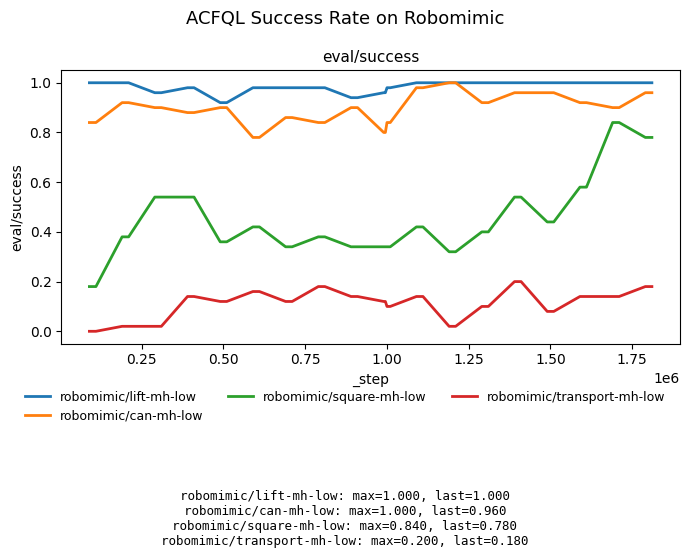

In [59]:
csvs = [
    "/home/robros/git/qc-flow-priority-sampling/csv/acfql/acfql_lift.csv",
    "/home/robros/git/qc-flow-priority-sampling/csv/acfql/acfql_can.csv",
    "/home/robros/git/qc-flow-priority-sampling/csv/acfql/acfql_square.csv",
    "/home/robros/git/qc-flow-priority-sampling/csv/acfql/acfql_transport.csv",
]

# # Offline
# plot_csvs(
#     csv_files=csvs,
#     y_keys=[
#         "offline_agent/actor/actor_loss",
#         "offline_agent/critic/critic_loss",
#     ],
#     light=True,
# )

# # Online
# plot_csvs(
#     csv_files=csvs,
#     y_keys=[
#         "online_agent/actor/actor_loss",
#         "online_agent/critic/critic_loss",
#     ],
#     light=False,
# )


# Success rate
plot_csvs(
    csv_files=csvs,
    y_keys=["eval/success"],
    legends=[
        "robomimic/lift-mh-low",
        "robomimic/can-mh-low",
        "robomimic/square-mh-low",
        "robomimic/transport-mh-low",
    ],
    light=False,
    align_to_shortest=True,
    title="ACFQL Success Rate on Robomimic"
)


In [157]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from typing import List, Optional, Tuple


def plot_csvs_pretty_v3(
    csv_files: List[str],
    y_key: str = "eval/success",
    x_key: str = "_step",
    title: str = "ACFQL Success Rate on Robomimic",
    legends: Optional[List[str]] = None,
    light: bool = False,
    linewidth: float = 2.2,
    align_to_shortest: bool = False,
    legend_ncol: int = 3,
    offline_steps: Optional[int] = 1_000_000,
    # ===== visibility helpers =====
    smooth_window: Optional[int] = None,    # e.g., 2000 (None이면 smoothing 안 함)
    downsample: Optional[int] = None,       # e.g., 10 (None이면 downsample 안 함)
    show_raw: bool = False,                 # raw + smooth 같이 보기
    logy: Optional[bool] = None,            # None이면 자동 판단, True/False 강제
    # ===== NEW: summary + y-limit branching =====
    show_summary: bool = False,
    y_limit_mode: str = "auto",             # "auto" | "fixed_success" | "fixed"
    ymin: Optional[float] = None,           # y_limit_mode="fixed"일 때 사용
    ymax: Optional[float] = None,           # y_limit_mode="fixed"일 때 사용
    auto_pad_ratio: float = 0.05,           # auto 모드에서 상하 padding 비율
    auto_percentile_clip: Optional[float] = None,  # 예: 99.5 (spike 많을 때 상단 clip)
):
    """
    y_limit_mode:
      - "auto": 데이터(min/max) 기반 자동 범위 (+padding, 선택적 percentile clip)
      - "fixed_success": y_key에 success가 포함되면 [0,1] 고정, 아니면 auto처럼 동작
      - "fixed": ymin/ymax로 강제 (둘 다 있어야 함)
    """

    alpha = 0.35 if light else 1.0

    if legends is None:
        legends = [os.path.basename(p) for p in csv_files]
    assert len(legends) == len(csv_files)

    def _downsample_xy(x, y, k: Optional[int]):
        if k is None or k <= 1:
            return x, y
        return x[::k], y[::k]

    def _smooth(y, window: Optional[int]):
        if window is None or window <= 1:
            return y
        return pd.Series(y).rolling(window, min_periods=1).mean().to_numpy()

    def _finite_minmax(arr: np.ndarray) -> Tuple[float, float]:
        a = np.asarray(arr)
        a = a[np.isfinite(a)]
        if a.size == 0:
            return (np.nan, np.nan)
        return float(a.min()), float(a.max())

    # ---- load ----
    dfs, max_steps = [], []
    for p in csv_files:
        df = pd.read_csv(p)
        if x_key in df.columns:
            df = df.dropna(subset=[x_key])
            if len(df) > 0:
                max_steps.append(df[x_key].max())
        dfs.append(df)

    step_limit = min(max_steps) if (align_to_shortest and max_steps) else None

    # ---- layout: title row + legend row + plot + summary ----
    fig = plt.figure(figsize=(9.2, 7.6))
    gs = GridSpec(
        4, 1,
        height_ratios=[0.55, 0.70, 5.0, 1.75],
        hspace=0.5
    )

    ax_title  = fig.add_subplot(gs[0]); ax_title.axis("off")
    ax_legend = fig.add_subplot(gs[1]); ax_legend.axis("off")
    ax        = fig.add_subplot(gs[2])
    ax_sum    = fig.add_subplot(gs[3]); ax_sum.axis("off")

    ax_title.text(0.5, 0.5, title, ha="center", va="center",
                  fontsize=15, weight="bold")
    ax.set_title(y_key, fontsize=11, pad=8)

    summary_rows = []  # (label, min, max, last)
    all_y_for_limits = []  # auto y-limits 계산용

    # ---- plot ----
    for df, run_label in zip(dfs, legends):
        if x_key not in df.columns or y_key not in df.columns:
            continue

        sub = df[[x_key, y_key]].dropna()
        if step_limit is not None:
            sub = sub[sub[x_key] <= step_limit]
        if len(sub) == 0:
            continue

        x = sub[x_key].to_numpy()
        y = sub[y_key].to_numpy()

        # downsample (먼저)
        x, y = _downsample_xy(x, y, downsample)

        # (선택) raw 먼저 얇게
        if show_raw and smooth_window is not None and smooth_window > 1:
            ax.plot(x, y, alpha=0.15, linewidth=0.8, label="_nolegend_")

        # smooth
        y_plot = _smooth(y, smooth_window)

        y_min, y_max = _finite_minmax(y_plot)
        y_last = float(y_plot[np.isfinite(y_plot)][-1]) if np.isfinite(y_plot).any() else np.nan
        summary_rows.append((run_label, y_min, y_max, y_last))

        all_y_for_limits.append(y_plot[np.isfinite(y_plot)])

        ax.plot(x, y_plot, alpha=alpha, linewidth=linewidth, label=run_label)

    ax.set_xlabel("step", labelpad=10)
    ax.set_ylabel(y_key)
    ax.grid(True, alpha=0.25)

    # ---- auto log-scale for loss-like keys ----
    if logy is None:
        if ("loss" in y_key) and ("success" not in y_key):
            logy = True
        else:
            logy = False
    if logy:
        ax.set_yscale("log")

    # ---- y-limit branching ----
    def _apply_auto_limits():
        if len(all_y_for_limits) == 0:
            return
        y_all = np.concatenate(all_y_for_limits) if len(all_y_for_limits) > 1 else all_y_for_limits[0]
        y_all = y_all[np.isfinite(y_all)]
        if y_all.size == 0:
            return

        y_lo = float(np.min(y_all))
        y_hi = float(np.max(y_all))

        # 선택적 상단 clip (spike 방지)
        if auto_percentile_clip is not None:
            y_hi = float(np.percentile(y_all, auto_percentile_clip))

        if logy:
            # log scale에서는 0/음수 방지
            if y_lo <= 0:
                pos = y_all[y_all > 0]
                if pos.size > 0:
                    y_lo = float(np.min(pos))
                else:
                    return  # 전부 0이면 로그 못 씀
            # padding은 곱셈 스케일로
            pad = auto_pad_ratio
            ax.set_ylim(y_lo * (1 - pad), y_hi * (1 + pad))
        else:
            # 선형 padding
            span = max(1e-12, y_hi - y_lo)
            pad = span * auto_pad_ratio
            ax.set_ylim(y_lo - pad, y_hi + pad)

    if y_limit_mode == "fixed":
        if ymin is None or ymax is None:
            raise ValueError("y_limit_mode='fixed'이면 ymin/ymax 둘 다 지정해야 합니다.")
        ax.set_ylim(ymin, ymax)

    elif y_limit_mode == "fixed_success":
        if "success" in y_key:
            ax.set_ylim(-0.02, 1.02)
        else:
            _apply_auto_limits()

    elif y_limit_mode == "auto":
        # 기존처럼 success면 고정하고 싶다면 fixed_success를 쓰는 걸 추천
        _apply_auto_limits()

    else:
        raise ValueError("y_limit_mode must be one of: 'auto' | 'fixed_success' | 'fixed'")

    # offline->online boundary
    if offline_steps is not None:
        ax.axvline(offline_steps, linestyle="--", linewidth=1.2, alpha=0.7)

    # ---- legend (robust) ----
    lines = ax.get_lines()
    handles, leg_labels = [], []
    for ln in lines:
        lab = ln.get_label()
        if lab is None:
            continue
        if lab.startswith("_"):  # '_nolegend_' 포함
            continue
        handles.append(ln)
        leg_labels.append(lab)

    if len(handles) > 0:
        ax_legend.legend(
            handles, leg_labels,
            loc="center",
            ncol=min(legend_ncol, len(leg_labels)),
            frameon=False,
            fontsize=9,
            handlelength=2.8,
            columnspacing=1.6,
        )
    else:
        ax_legend.text(
            0.5, 0.5,
            "No plotted lines (check y_key/x_key, NaNs, or step_limit).",
            ha="center", va="center", fontsize=9
        )

    # ---- summary table (min/max/last) ----
    if show_summary and len(summary_rows) > 0:
        def short(s, maxlen=36):
            return (s[:maxlen - 1] + "…") if len(s) > maxlen else s

        table_data = [
            [short(lab), f"{mn:.6g}", f"{mx:.6g}", f"{last:.6g}"]
            for (lab, mn, mx, last) in summary_rows
        ]

        ax_sum.text(
            0.01, 0.97, "Summary:",
            transform=ax_sum.transAxes,
            fontsize=9, weight="bold", va="top",
        )

        tbl = ax_sum.table(
            cellText=table_data,
            colLabels=["Run", "Min", "Max", "Last"],
            cellLoc="left",
            colLoc="left",
            loc="center",
            bbox=[0.01, 0.05, 0.98, 0.82],
        )
        tbl.auto_set_font_size(False)
        tbl.set_fontsize(9)
        tbl.scale(1.0, 1.25)

        for (r, c), cell in tbl.get_celld().items():
            cell.set_linewidth(0.3)
            if r == 0:
                cell.set_text_props(weight="bold")
                cell.set_alpha(0.10)
            else:
                cell.set_alpha(0.0)

    plt.show()


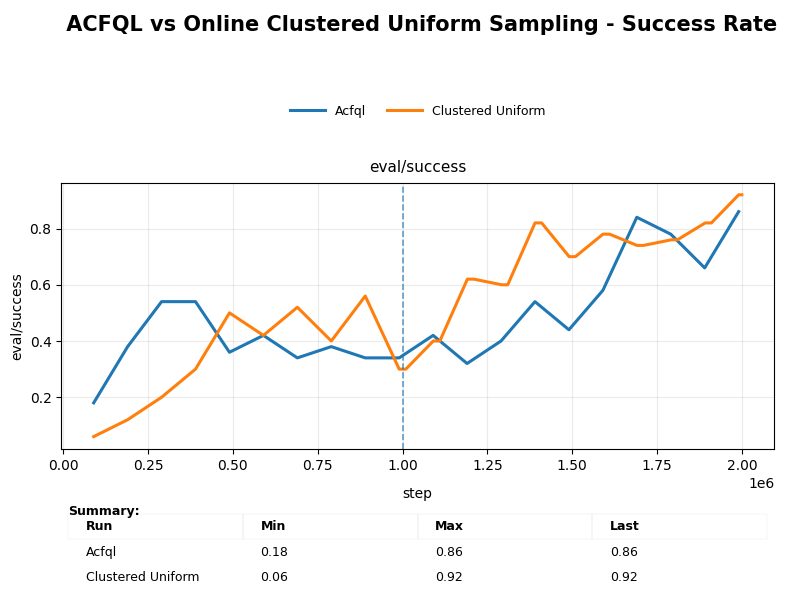

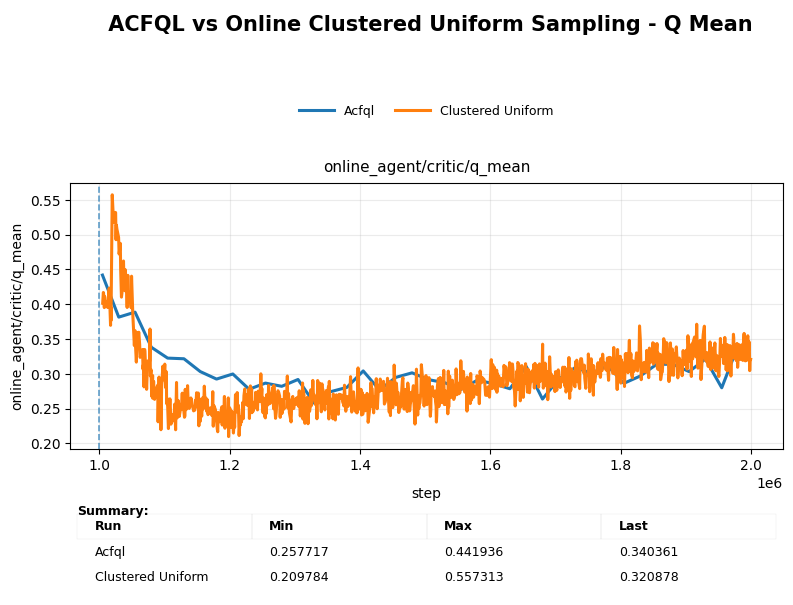

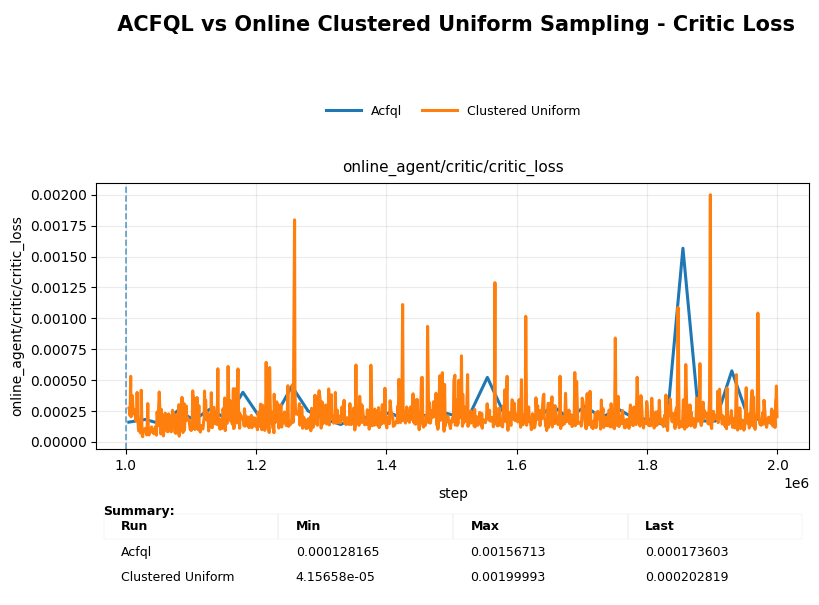

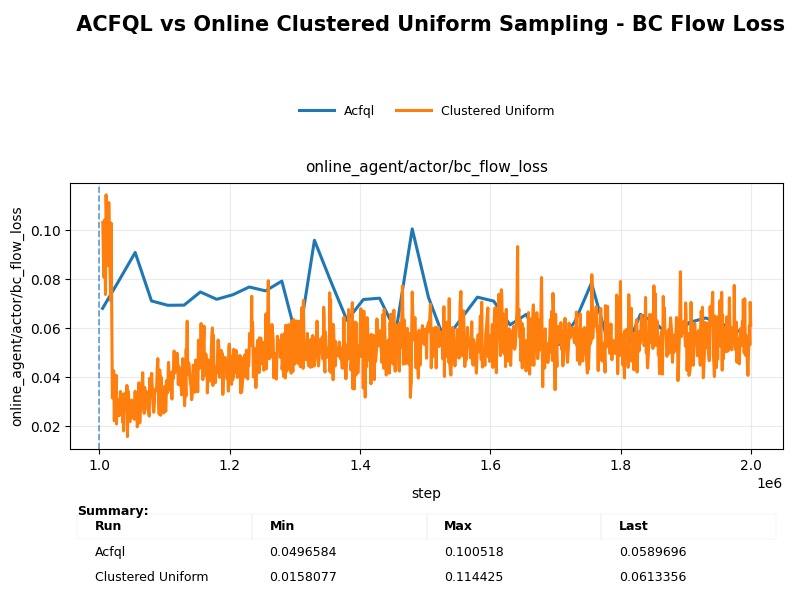

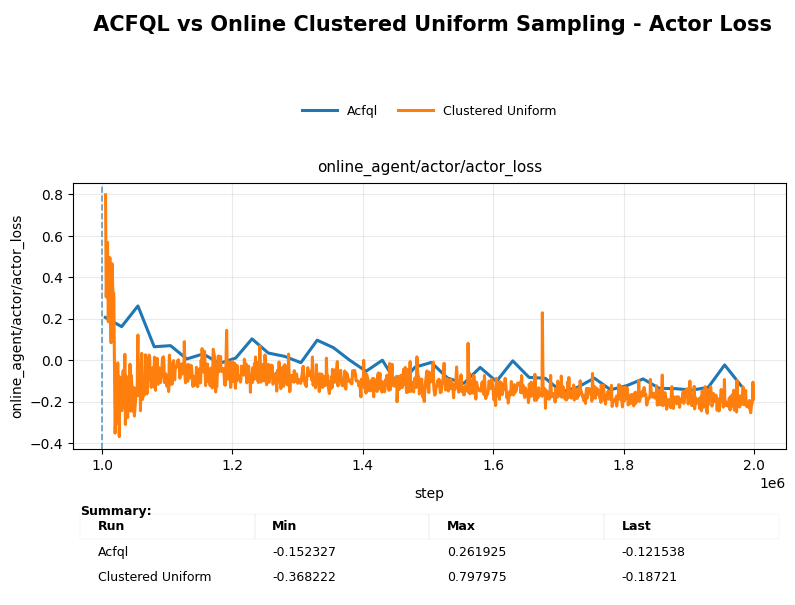

In [ ]:
csvs = [
    "/home/robros/git/qc-flow-priority-sampling/csv/square/square_ranked_tderror.csv",
    "/home/robros/git/qc-flow-priority-sampling/csv/square/square_ranked_avgreward.csv",
    "/home/robros/git/qc-flow-priority-sampling/csv/square/square_ranked_uqmreward.csv"
]

y_keys = [
    "eval/success",
    "ptr/sample_online/seg_return_mean",
    "online_agent/critic/critic_loss",
    "online_agent/actor/bc_flow_loss",
    "online_agent/actor/actor_loss",
]

titles = [
    " ACFQL vs Online Clustered Uniform Sampling - Success Rate",
    " ACFQL vs Online Clustered Uniform Sampling - Q Mean",
    " ACFQL vs Online Clustered Uniform Sampling - Critic Loss",
    " ACFQL vs Online Clustered Uniform Sampling - BC Flow Loss",
    " ACFQL vs Online Clustered Uniform Sampling - Actor Loss",
]

# for y_key, title in zip(y_keys, titles):
#     plot_csvs_pretty_v3(
#         csv_files=csvs,
#         y_key=y_key,
#         title=title,
#         legends=[
#             "UQMReward",
#             "Ranked UQMReward",
#         ],
#         light=False,
#         align_to_shortest=True,
#         legend_ncol=2,
#     )

for y_key, title in zip(y_keys, titles):
    plot_csvs_pretty_v3(
        csv_files=csvs,
        y_key=y_key,
        title=title,
        legends=["Acfql", "Clustered Uniform"],
        align_to_shortest=True,
        legend_ncol=2,
        smooth_window=0,  
        downsample=5,
        logy=False,
    )


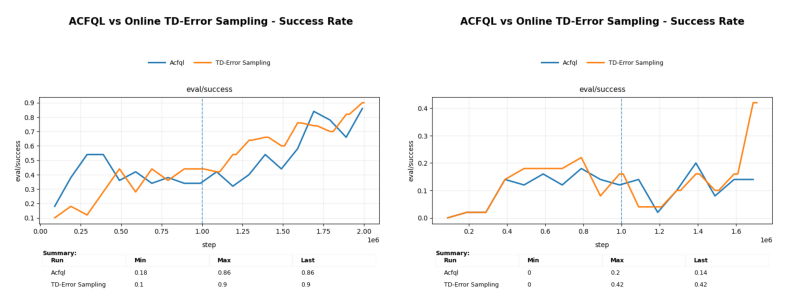

In [156]:
import math
import matplotlib.pyplot as plt
from PIL import Image

def plot_images_with_positions(
    image_map,
    grid=None,                 # (rows, cols) or None(auto)
    figsize=(8, 6),
    wspace=0.05,
    hspace=0.05,
    auto_compact=False,        # True면 image_map 개수로 "최소 rows x cols" 자동 배치(positions 무시)
):
    """
    image_map: dict
      key   -> (row, col)  (0-indexed)   [auto_compact=False일 때 사용]
      value -> image path (str)

    grid:
      (rows, cols)로 원하는 사이즈 강제 (예: (1,2), (5,2), (2,3))
      None이면 image_map에 있는 (r,c) 최대값 기준으로 자동 결정

    auto_compact:
      True면 positions를 무시하고, image_map에 들어온 순서대로 좌->우, 위->아래 채움
      (이때 image_map은 {(0,0):path,...} 형태가 아니라 그냥 dict이어도 되지만, 순서는 입력 순서)
    """

    # ---------- decide grid ----------
    if auto_compact:
        n = len(image_map)
        if grid is None:
            # 기본: 2열로 깔끔하게(원하면 바꿔도 됨)
            cols = 2 if n > 1 else 1
            rows = math.ceil(n / cols)
        else:
            rows, cols = grid
    else:
        if grid is None:
            # image_map의 최대 (r,c)에서 자동 산정
            max_r = max(r for (r, c) in image_map.keys()) if image_map else 0
            max_c = max(c for (r, c) in image_map.keys()) if image_map else 0
            rows, cols = max_r + 1, max_c + 1
        else:
            rows, cols = grid

    assert rows >= 1 and cols >= 1, f"Invalid grid {(rows, cols)}"

    # squeeze=False: 1x2여도 axes가 항상 (rows, cols) 2D 배열
    fig, axes = plt.subplots(rows, cols, figsize=figsize, squeeze=False)

    # ---------- init all axes off ----------
    for ax in axes.flatten():
        ax.axis("off")

    # ---------- place images ----------
    if auto_compact:
        # positions 무시하고 순서대로 채움
        items = list(image_map.items())  # ((pos), path) 형태여도 path만 씀
        idx = 0
        for r in range(rows):
            for c in range(cols):
                if idx >= len(items):
                    break
                _, img_path = items[idx]
                img = Image.open(img_path)
                axes[r, c].imshow(img)
                axes[r, c].axis("off")
                idx += 1
    else:
        # 지정된 (r,c)에만 삽입
        for (r, c), img_path in image_map.items():
            assert 0 <= r < rows and 0 <= c < cols, (
                f"Invalid position {(r, c)} for grid {(rows, cols)}"
            )
            img = Image.open(img_path)
            axes[r, c].imshow(img)
            axes[r, c].axis("off")

    plt.subplots_adjust(
        left=0.02, right=0.98, top=0.98, bottom=0.02,
        wspace=wspace, hspace=hspace
    )
    plt.show()



image_map = {
    (0, 0): "/home/robros/git/qc-flow-priority-sampling/csv/square/ACFQL vs Online TD-Error Sampling - Success Rate.png",
    (0, 1): "/home/robros/git/qc-flow-priority-sampling/csv/transport/ACFQL vs Online TD-Error Sampling - Success Rate.png",

    # (1, 0): "/home/robros/git/qc-flow-priority-sampling/csv/square/AvgReward priority vs Ranked AvgReward priority - Q Mean.png",
    # (1, 1): "/home/robros/git/qc-flow-priority-sampling/csv/square/UQMReward priority vs Ranked UQMReward priority - Q Mean.png",

    # (2, 0): "/home/robros/git/qc-flow-priority-sampling/csv/square/AvgReward priority vs Ranked AvgReward priority - Critic Loss.png",
    # (2, 1): "/home/robros/git/qc-flow-priority-sampling/csv/square/UQMReward priority vs Ranked UQMReward priority - Critic Loss.png",

    # (3, 0): "/home/robros/git/qc-flow-priority-sampling/csv/square/AvgReward priority vs Ranked AvgReward priority - BC Flow Loss.png",
    # (3, 1): "/home/robros/git/qc-flow-priority-sampling/csv/square/UQMReward priority vs Ranked UQMReward priority - BC Flow Loss.png",

    # (4, 0): "/home/robros/git/qc-flow-priority-sampling/csv/square/AvgReward priority vs Ranked AvgReward priority - Actor Flow Loss.png",
    # (4, 1): "/home/robros/git/qc-flow-priority-sampling/csv/square/UQMReward priority vs Ranked UQMReward priority - Actor Flow Loss.png",
}

plot_images_with_positions(image_map, grid=(1, 2), figsize=(8, 3))



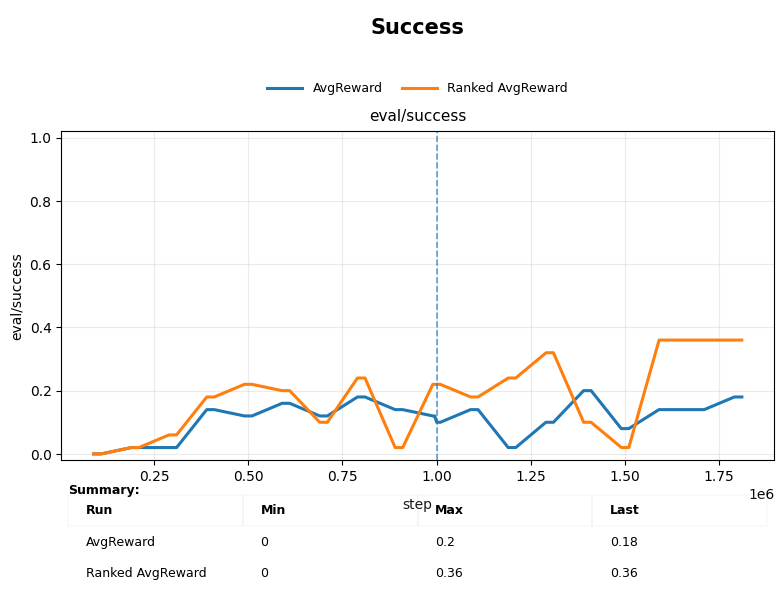

In [125]:
plot_csvs_pretty_v3(
    csv_files=csvs,
    y_key="eval/success",
    title="Success",
    legends=["AvgReward", "Ranked AvgReward"],
    smooth_window=0,
    downsample=0,
    show_raw=False,
    y_limit_mode="fixed_success",
)
